<a href="https://colab.research.google.com/github/Gaks978/DML-Checkpoint/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What You're Aiming For

Dataset Selection:
Head over to Kaggle and choose a dataset that aligns with your interests. Ensure it involves either a classification or regression task.
Real-world data can be messy, and that's perfectly fine! You're here to tame it.

Data Preprocessing:
Identify and handle missing values within your dataset. Employ effective strategies for dealing with missing data.
Implement data cleaning, formatting, and organization to prepare your dataset for training.

Feature Engineering:
Enhance your model's performance by creating new features or transforming existing ones.
Tailor your feature engineering techniques to address the specific needs of your chosen project.

Data Visualization:
Utilize data visualization techniques to gain insights into your dataset.
Create visualizations that reveal patterns and relationships, aiding your understanding of the data.

Model Selection:
Choose the right model based on the nature of your problem.
Consider factors such as the task type (classification or regression), dataset size, and alignment with algorithm assumptions.

Model Evaluation:
Evaluate your model's performance using appropriate metrics for the chosen task (accuracy, classification reports, confusion matrices).
Use appropriate methods: hyper parameter tuning, cross validation, etc.
Justify your model selection and discuss the implications of your results.

Project Submission:
Share your code and findings in the assignment section. Provide clear documentation and explanations.
Highlight any challenges faced during the project and how you overcame them.

Instructions
What dataset did you use?
Explain your project! I want to see the thinking behind the code essentially.
e.g. why this project interested you, the steps you took while doing the project, how you decided what model to use.

# Project Overview: Investment Program Prediction

## Why This Project?

Banks want to personalize offers to clients to improve uptake and customer satisfaction. This project seeks to predict which investment program (labelled as InvType) a customer is most likely to accept, based on their:

a) Demographics (SE1, SE2)

b) Banking activity (BA1–BA7)

c) Investment history (PE1–PE15)

d) Investment activity (IA1–IA3)

The target variable is InvType, a classification problem.

In [68]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Loading our data
df = pd.read_csv('/content/investing_program_prediction_data.csv')
df.head()

SE1  SE2  BA1  BA2    BA3      BA4      BA5     BA6    BA7 PE1  ... PE10  \
0   45  G29   12  0.0   5934        0        0       0      0  I0  ...   I0   
1   41   G0    0  0.0  21514   316374     5142       0   5141  I0  ...   I0   
2   43   G0    1  0.0  14324    22344    22344       0  22344  I0  ...   I0   
3   36  G52   16  0.0  41114  2406838  1156219  692875  41425  I0  ...   I1   
4    2  G10    0  0.0   2394      621      621       0    621  I0  ...   I0   

  PE11 PE12 PE13 PE14 PE15 IA1 IA2 IA3 InvType  
0   I0   I0   I0   I0   I0   0   0   1      C1  
1   I0   I1   I1   I1   I0   0   0   1      C1  
2   I0   I0   I0   I0   I0   0   0   0      C1  
3   I1   I1   I1   I0   I0   0   0   0      C1  
4   I0   I0   I0   I0   I0   0   0   0      C1  

[5 rows x 28 columns]

In [70]:
# General info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4734 entries, 0 to 4733
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SE1      4734 non-null   int64  
 1   SE2      4734 non-null   object 
 2   BA1      4734 non-null   int64  
 3   BA2      4734 non-null   float64
 4   BA3      4734 non-null   int64  
 5   BA4      4734 non-null   int64  
 6   BA5      4734 non-null   int64  
 7   BA6      4734 non-null   int64  
 8   BA7      4734 non-null   int64  
 9   PE1      4734 non-null   object 
 10  PE2      4734 non-null   object 
 11  PE3      4734 non-null   object 
 12  PE4      4734 non-null   object 
 13  PE5      4734 non-null   object 
 14  PE6      4734 non-null   object 
 15  PE7      4734 non-null   object 
 16  PE8      4734 non-null   object 
 17  PE9      4734 non-null   object 
 18  PE10     4734 non-null   object 
 19  PE11     4734 non-null   object 
 20  PE12     4734 non-null   object 
 21  PE13     4734 

In [71]:
# Generating a profile report
!pip install ydata-profiling
import ydata_profiling as ydata_profiling

In [72]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="/content/investing_program_prediction_data.csv")
profile.to_file("/content/investing_program_prediction_data.csv.html")
display(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 28/28 [00:01<00:00, 21.78it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [73]:
# Removing duplicate
df = df.drop_duplicates()

<Axes: >

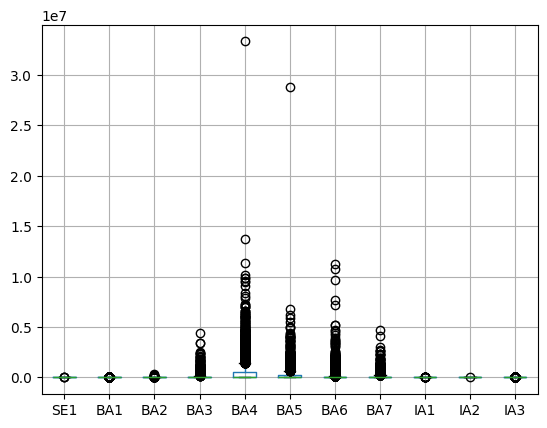

In [74]:
# Check for outliers
df.boxplot()

In [75]:
# Handling outliers
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Apply IQR capping to each numeric column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

/tmp/ipython-input-75-191148863.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] < lower_bound, lower_bound,
/tmp/ipython-input-75-191148863.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] < lower_bound, lower_bound,
/tmp/ipython-input-75-191148863.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

# Feature Engineering

In [76]:
# label encoding categorical features
from sklearn.preprocessing import LabelEncoder

# Label Encode SE2 (Geographic location)
le = LabelEncoder()
df['SE2'] = le.fit_transform(df['SE2'])

# Convert PE columns to binary: I0 -> 0, I1 -> 1
pe_cols = [col for col in df.columns if col.startswith('PE')]
df[pe_cols] = df[pe_cols].replace({'I0': 0, 'I1': 1})

/tmp/ipython-input-76-2752662524.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SE2'] = le.fit_transform(df['SE2'])
/tmp/ipython-input-76-2752662524.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[pe_cols] = df[pe_cols].replace({'I0': 0, 'I1': 1})


In [77]:
# Creating aggregated features
# We can summarize behavior to create new insights.
# Banking Activity:You have 7 columns: BA1 to BA7
# Create a total bank activity:
df['total_bank_activity'] = df[df.columns[df.columns.str.startswith('BA')]].sum(axis=1)

/tmp/ipython-input-77-2589027275.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_bank_activity'] = df[df.columns[df.columns.str.startswith('BA')]].sum(axis=1)


In [78]:
# Past Investment History:You have 15 flags: PE1 to PE15
# Count how many programs a customer invested in:
df['num_programs_invested'] = df[df.columns[df.columns.str.startswith('PE')]].sum(axis=1)

/tmp/ipython-input-78-2047950426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_programs_invested'] = df[df.columns[df.columns.str.startswith('PE')]].sum(axis=1)


In [79]:
# Investment Activity:You have: IA1, IA2, IA3
# Add a total investment operations count:
df['total_investment_operations'] = df[df.columns[df.columns.str.startswith('IA')]].sum(axis=1)

/tmp/ipython-input-79-2628906285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_investment_operations'] = df[df.columns[df.columns.str.startswith('IA')]].sum(axis=1)


# Data Visualization

/tmp/ipython-input-80-3495798139.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='InvType', palette = 'viridis')


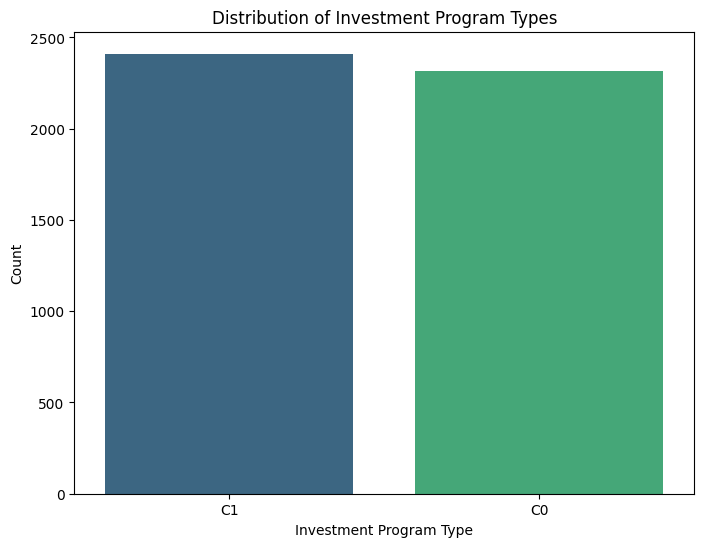

In [80]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='InvType', palette = 'viridis')
plt.title('Distribution of Investment Program Types')
plt.xlabel('Investment Program Type')
plt.ylabel('Count')
plt.show()

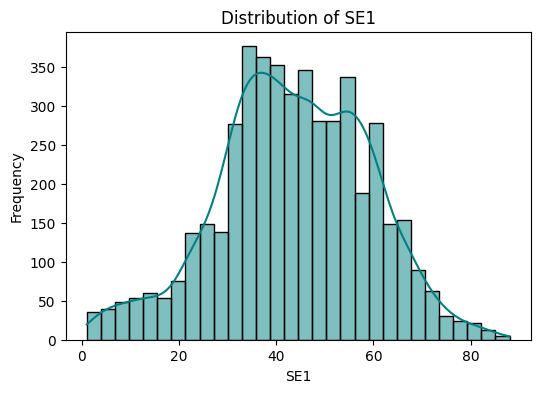

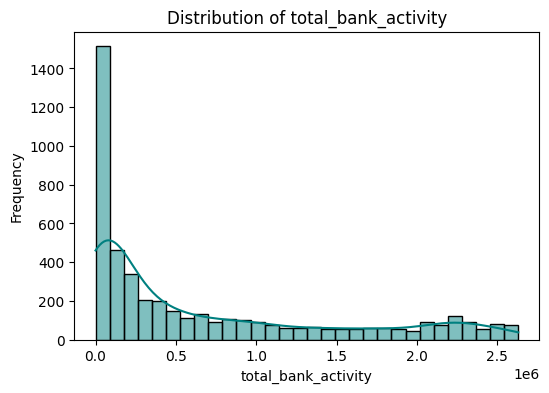

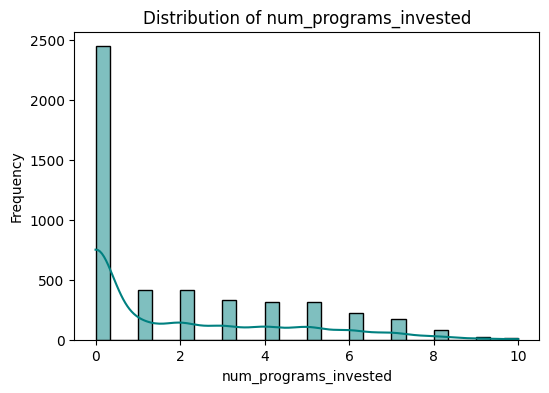

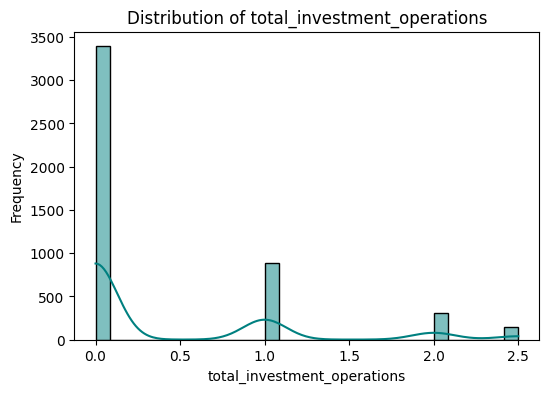

In [81]:
# Distribution of Numeric Features
numeric_cols = ['SE1', 'total_bank_activity', 'num_programs_invested', 'total_investment_operations']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

/tmp/ipython-input-82-1967860484.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='num_programs_invested', palette = 'viridis')


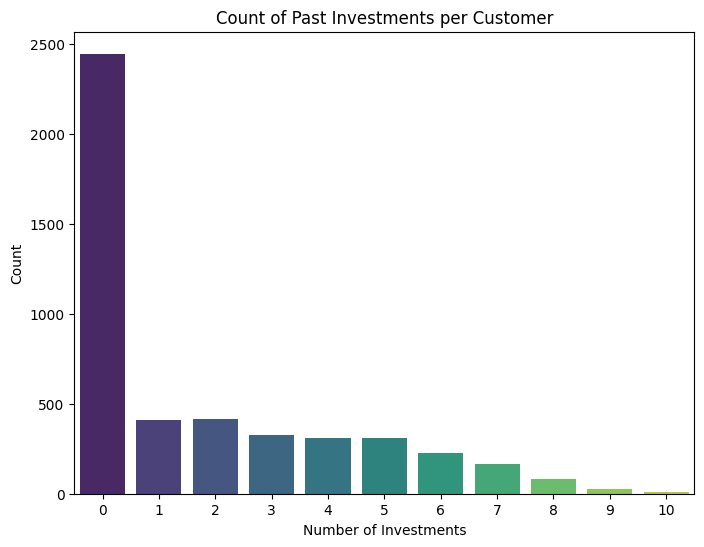

In [82]:
# Count of Past Investments per Customer
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='num_programs_invested', palette = 'viridis')
plt.title('Count of Past Investments per Customer')
plt.xlabel('Number of Investments')
plt.ylabel('Count')
plt.show()


# Model Selection

In [83]:
# Split the Data
from sklearn.model_selection import train_test_split
# separate features and target
X = df.drop(['InvType'], axis=1)
y = df['InvType']
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [84]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize the model
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # Helps if classes are imbalanced
)

# Train
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [85]:
# Predict
y_pred = rf.predict(X_test)

In [86]:
# Evaluate Model Performance
# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          C0       0.76      0.83      0.79       463
          C1       0.82      0.75      0.78       483

    accuracy                           0.79       946
   macro avg       0.79      0.79      0.79       946
weighted avg       0.79      0.79      0.79       946

[[383  80]
 [122 361]]


In [87]:
# Check Feature Importance

# Create DataFrame of feature importances
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

# Display top 10
print(feat_importances.head(20))

BA3                            0.202571
BA7                            0.133717
total_bank_activity            0.127331
SE1                            0.109909
BA5                            0.089375
BA4                            0.079946
SE2                            0.066084
BA1                            0.039290
num_programs_invested          0.028866
BA6                            0.026888
IA3                            0.012112
total_investment_operations    0.011584
PE13                           0.007951
PE12                           0.007669
PE5                            0.007561
PE10                           0.007473
PE6                            0.006448
PE14                           0.005835
PE11                           0.005832
PE7                            0.005259
dtype: float64


/tmp/ipython-input-88-2386001922.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


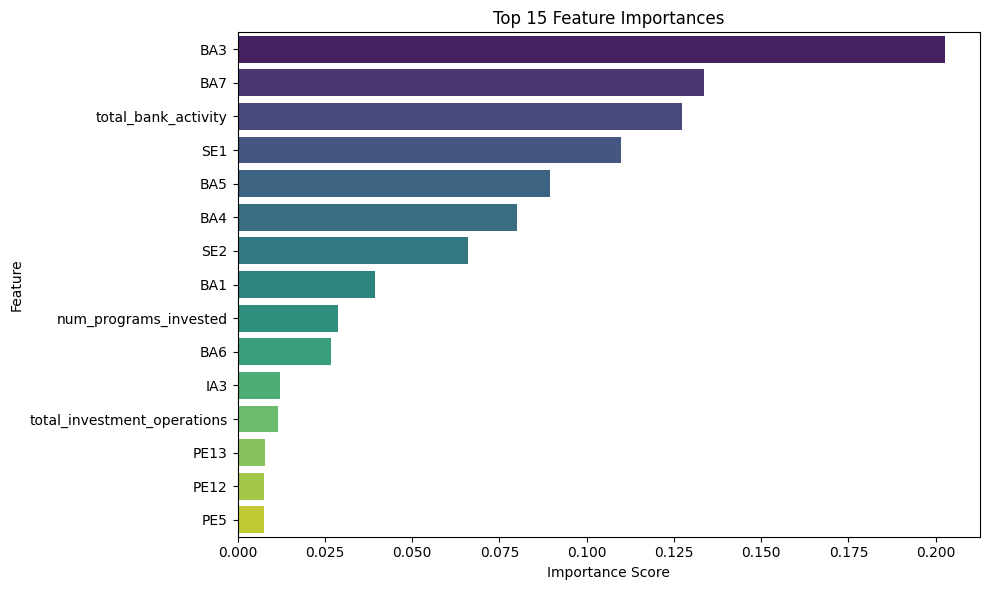

In [88]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=feat_importances.head(15),
    y=feat_importances.head(15).index,
    palette="viridis"
)
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

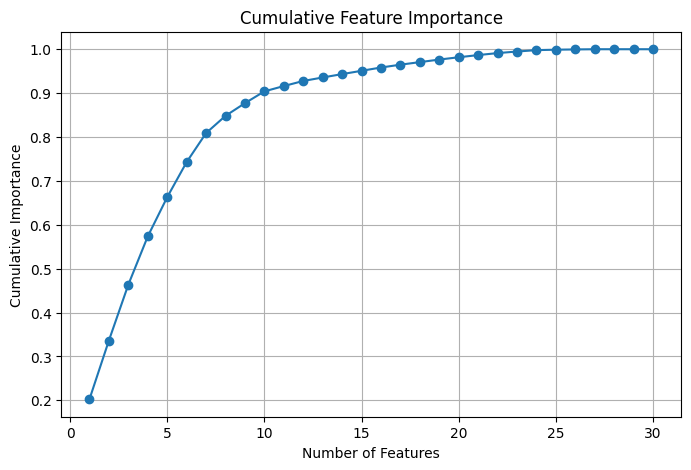

In [89]:
# Compute cumulative importance
cumulative_importance = feat_importances.cumsum()

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_importance)+1), cumulative_importance, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.grid(True)
plt.show()


Observation:

Most predictive are BA3, BA7, total banking activity, and SE1.

Many PE columns contribute very little (around 0.005–0.007).

IA3 and total_investment_operations are also low importance.



In [90]:
# Keep all features with importance >0.01.
#Drop features with importance <0.01
# List of low-importance columns to drop
low_importance_features = [
    'IA3',
    'total_investment_operations',
    'PE13', 'PE12', 'PE5', 'PE10',
    'PE6', 'PE14', 'PE11', 'PE7'
]

# Drop them from your feature set
X_reduced = X.drop(columns=low_importance_features)

In [91]:
# Retrain the Model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, stratify=y, random_state=42
)

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf_reduced = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf_reduced.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [93]:
# Evaluate the New Model
from sklearn.metrics import classification_report

y_pred_reduced = rf_reduced.predict(X_test)

print(classification_report(y_test, y_pred_reduced))

              precision    recall  f1-score   support

          C0       0.76      0.82      0.79       463
          C1       0.81      0.75      0.78       483

    accuracy                           0.78       946
   macro avg       0.79      0.79      0.78       946
weighted avg       0.79      0.78      0.78       946



# Hyper parameter tuning

In [94]:
# Define the Parameter Grid
param_grid = {
    'n_estimators': [100, 200],       # Number of trees
    'max_depth': [None, 10, 20],      # Max depth of trees
    'min_samples_split': [2, 5],      # Min samples to split a node
}

In [95]:
# Create GridSearchCV
# We’ll set up 3-fold cross-validation and accuracy scoring:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=3,                 # 3-fold cross-validation
    scoring='accuracy',   # Can change to 'f1_macro' if class imbalance is severe
    n_jobs=-1             # Use all CPU cores
)

In [96]:
# Fit the Grid Search on the Training Data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [97]:
# View the Best Parameters
print("Best Parameters Found:", grid_search.best_params_)

Best Parameters Found: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


In [98]:
# Use the Best Model to Predict
# The best model is already retrained on the full training set inside grid_search.best_estimator_:
# Predict on test set
y_pred_best = grid_search.best_estimator_.predict(X_test)

In [99]:
# Evaluate Performance
#Generate a classification report and compare it to your previous model:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

          C0       0.76      0.83      0.79       463
          C1       0.82      0.75      0.78       483

    accuracy                           0.79       946
   macro avg       0.79      0.79      0.79       946
weighted avg       0.79      0.79      0.79       946



# Why I chose Random Forest as my Model:

1) Handles numeric and encoded categorical features easily

2) No scaling needed

3) Robust to outliers

4) Gives feature importances

5) Easy to tune

# Implication of Results
Our tuned Random Forest model predicts investment program preference with 79% accuracy. It shows balanced performance across both programs:

a) For Program 0, we correctly identify ~83% of true customers, with 76% precision.

b) For Program 1, we correctly identify ~75% of true customers, with 82% precision.

This model can significantly improve the targeting of investment program offers, reducing the need to propose multiple programs per customer. Although some misclassification remains, this represents a meaningful improvement over random or heuristic-based assignment.